# BRIEF - Binary Robust Independent Elementary Features

<https://www.cs.ubc.ca/~lowe/525/papers/calonder_eccv10.pdf>

Michael Calonder, Vincent Lepetit, Christoph Strecha, Pascal Fua

1. SURF is good, but matching is slow.
2. Paper proposes a fast descriptor method...
  1. Requires no pre-training and post-processing.
  2. Matching/retrieval can be done by computing hamming ditance.
3. Approach matches or outperforms SURF in all datasets *except*
  1. the Graffiti pictures dataset. Here the SURF gradient based descriptors work better.
  2. where the rotation is >15 degrees. This descriptor is not rotation invariant.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [109]:
import matplotlib.patches as patches

In [79]:
test_image = cv2.imread('/Users/tejaswin.p/Downloads/Fast_Brief/IMG_20200415_162333.jpg', cv2.IMREAD_GRAYSCALE)

In [80]:
test_image.shape

(3000, 4000)

In [81]:
# test_image = cv2.resize(test_image, (0, 0), fx=0.1, fy=0.1)

In [82]:
fast = cv2.FastFeatureDetector_create()
fast.setThreshold(26)
fast.setNonmaxSuppression(1)

In [83]:
kp = fast.detect(test_image, None)
img2 = cv2.drawKeypoints(test_image, kp, None, color=(255, 0, 0))

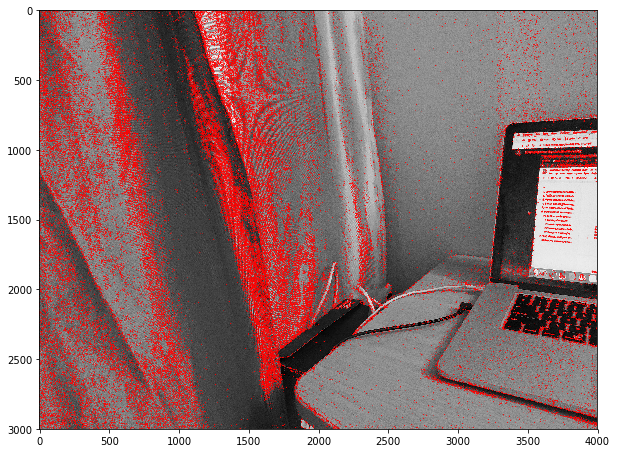

In [84]:
plt.figure(figsize=(10, 10))
plt.imshow(img2)

In [85]:
test_image = cv2.resize(test_image, (0, 0), fx=0.1, fy=0.1)
kp = fast.detect(test_image, None)
img2 = cv2.drawKeypoints(test_image, kp, None, color=(255, 0, 0))

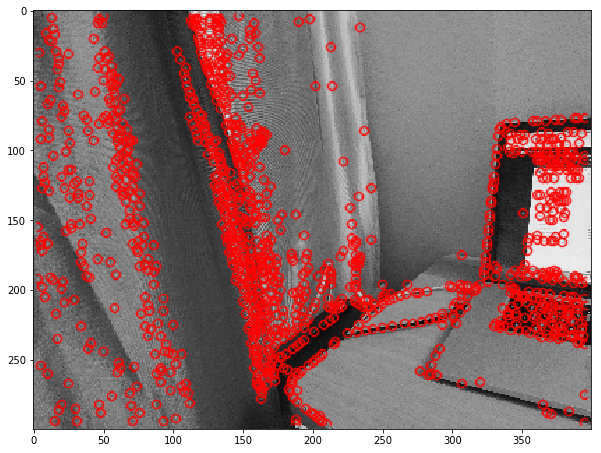

In [86]:
plt.figure(figsize=(10, 10))
plt.imshow(img2)

In [87]:
test_blur = cv2.GaussianBlur(test_image, (5, 5), 0)
kp = fast.detect(test_blur, None)
img2 = cv2.drawKeypoints(test_blur, kp, None, color=(255, 0, 0))

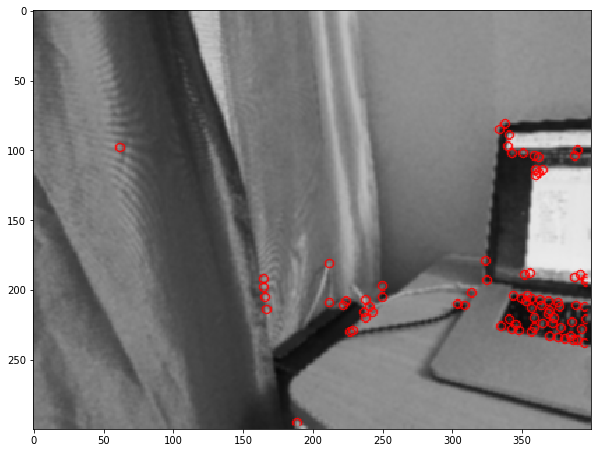

In [88]:
plt.figure(figsize=(10, 10))
plt.imshow(img2)

In [116]:
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

In [117]:
bkp, des = brief.compute(test_image, kp)

In [118]:
len(kp), len(bkp)

(81, 58)

In [119]:
brief.descriptorType(), brief.descriptorSize()

(0, 32)

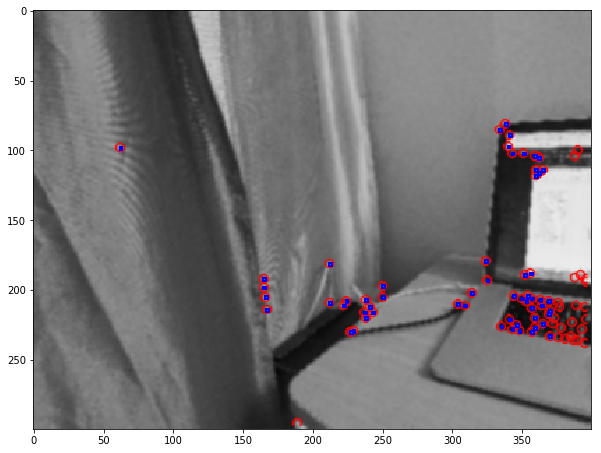

In [120]:
plt.figure(figsize=(10, 10))
plt.imshow(img2)
ax = plt.gca()
for val in bkp:
    _x, _y = int(val.pt[0]), int(val.pt[1])
    _patch = patches.Rectangle((_x-0.5, _y-0.5), 2, 2, linewidth=2, edgecolor='b', facecolor=None)
    ax.add_patch(_patch)

In [151]:
boxed = cv2.blur(test_image, (9, 9))

81 338


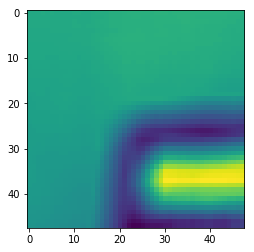

In [152]:
PATCH = 48
SMOOTHKERNEL = 9

_y, _x = int(bkp[0].pt[0]), int(bkp[0].pt[1])
print _x, _y

plt.imshow(boxed[_x-PATCH/2 : _x+PATCH/2, _y-PATCH/2 : _y+PATCH/2 ])

In [193]:
np.random.seed(23)
import random
random.seed(23)

In [258]:
sites = []
for a in np.arange(-23, 24):
    for b in np.arange(-23, 24):
        sites.append((a, b))
        
p1 = random.sample(sites, 512)
p2 = random.sample(sites, 512)

print len(set(p1)), len(set(p2)), len(set(zip(p1, p2)))

512 512 512


In [259]:
def get_fast_corners(image, threshold=26):
    fast = cv2.FastFeatureDetector_create()
    fast.setThreshold(threshold)
    fast.setNonmaxSuppression(1)
    
    kp = fast.detect(image, None)
    markers = cv2.drawKeypoints(image, kp, None, color=(255, 0, 0))
    
    return kp, markers

In [260]:
import pdb

In [261]:
def get_brief_descriptors(image, keypoints, pseq):
    descriptor = {}
    for val in keypoints:
        pixel = (int(val.pt[0]), int(val.pt[1]))
        vector = []
        
        try:
            for a, b in pseq:
                x = image[a[1] + pixel[1], a[0] + pixel[0]]
                y = image[b[1] + pixel[1], b[0] + pixel[0]]
                vector.append(x < y)
                
            descriptor[pixel] = vector
            
        except Exception as error:
            print "Failed for", pixel, error
            
    return descriptor

In [273]:
def matcher(d1, d2, threshold=0.8):
    final = []
    keys = d2.keys()
    values = np.array([d2[k] for k in keys])
    
    for k,v in d1.items():
        score = np.mean(values == v, axis=1)
        match = np.argmax(score)
        if score[match]>=threshold:
            final.append((k, keys[match]))
            
    return final

In [263]:
np.sum(np.ones((10, 3)), axis=1)

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [325]:
img1 = cv2.imread('/Users/tejaswin.p/Downloads/Fast_Brief/IMG_20200415_162333.jpg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (0, 0), fx=0.1, fy=0.1)
blur1 = cv2.GaussianBlur(img1, (5, 5), 0)

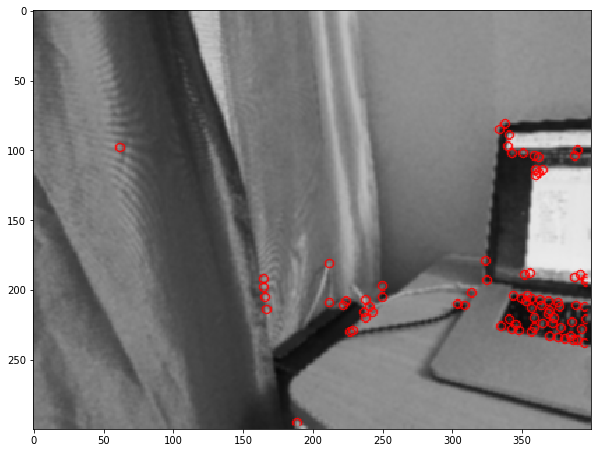

In [326]:
kps1, corners1 = get_fast_corners(blur1)

plt.figure(figsize=(10, 10))
plt.imshow(corners1);

In [327]:
bdescr1 = get_brief_descriptors(blur1, kps1, zip(p1, p2))

Failed for (390, 100) index 410 is out of bounds for axis 1 with size 400
Failed for (388, 104) index 408 is out of bounds for axis 1 with size 400
Failed for (392, 189) index 412 is out of bounds for axis 1 with size 400
Failed for (388, 191) index 408 is out of bounds for axis 1 with size 400
Failed for (396, 192) index 403 is out of bounds for axis 1 with size 400
Failed for (396, 194) index 403 is out of bounds for axis 1 with size 400
Failed for (389, 211) index 409 is out of bounds for axis 1 with size 400
Failed for (377, 212) index 400 is out of bounds for axis 1 with size 400
Failed for (395, 212) index 402 is out of bounds for axis 1 with size 400
Failed for (396, 221) index 403 is out of bounds for axis 1 with size 400
Failed for (386, 223) index 406 is out of bounds for axis 1 with size 400
Failed for (378, 227) index 400 is out of bounds for axis 1 with size 400
Failed for (393, 228) index 400 is out of bounds for axis 1 with size 400
Failed for (385, 233) index 405 is out

In [328]:
len(bdescr1)

62

In [329]:
img2 = cv2.imread('/Users/tejaswin.p/Downloads/Fast_Brief/IMG_20200415_162336.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2, (0, 0), fx=0.1, fy=0.1)
blur2 = cv2.GaussianBlur(img2, (5, 5), 0)

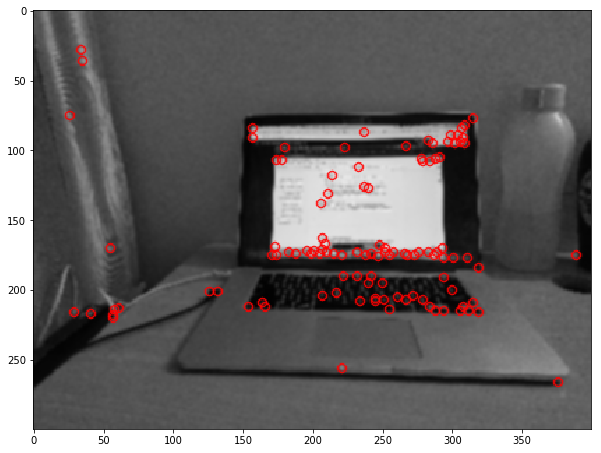

In [330]:
kps2, corners2 = get_fast_corners(blur2)

plt.figure(figsize=(10, 10))
plt.imshow(corners2);

In [331]:
bdescr2 = get_brief_descriptors(blur2, kps2, zip(p1, p2))

Failed for (389, 175) index 409 is out of bounds for axis 1 with size 400


In [332]:
import time

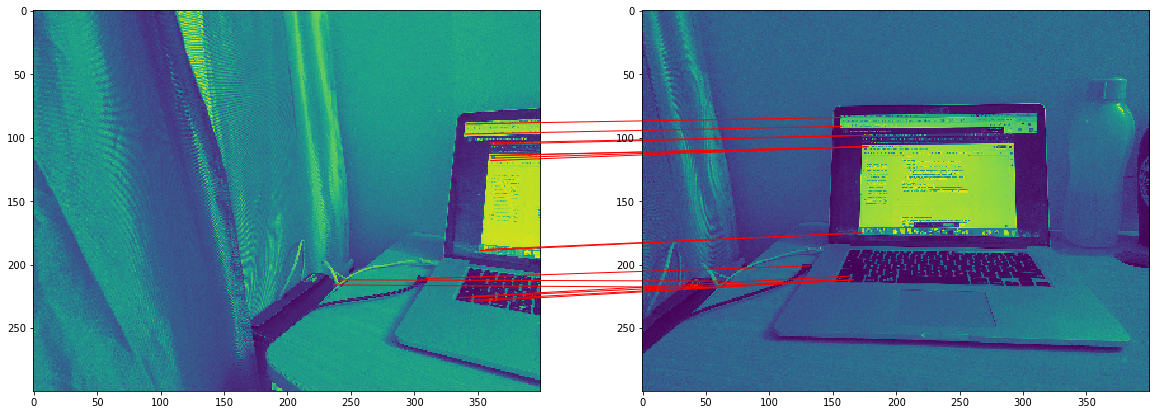

In [333]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(img1)
ax2.imshow(img2)

for one, two in matcher(bdescr1, bdescr2, threshold=0.82):
    conpatch = patches.ConnectionPatch(xyA=two, xyB=one, coordsA="data", coordsB="data", color='red',
                                      axesA=ax2, axesB=ax1)
    ax2.add_artist(conpatch)